In [258]:
import numpy as np
import matplotlib.pyplot as plt

In [259]:
lx = np.pi / 3  # 0 < x < pi/3
ly = np.pi / 2  # 0 < x < pi/2
t_max = 0.1

nx = 20  # кол-во шагов по x
ny = 20  # кол-во шагов по y
nt = 100  # число шагов по t

dx = lx / nx  # шаг по x
dy = ly / ny  # шаг по y
dt = t_max / nt  # шаг по времени

x = np.linspace(0, lx, nx + 1)
y = np.linspace(0, ly, ny + 1)
U = np.zeros((nx + 1, ny + 1))

In [260]:
# граничные и начальные условия

def condition_by_t(x, y):
    """Условия при t=0"""
    return np.cos(3 * x) * np.sin(4 * y)


def condition_by_y(U):
    """Условия при y=0 и y=pi/2"""
    U[:, 0] = 0
    U[:, ny] = 0
    return U


def condition_by_x(U):
    """Условия при du/dx=0 при x=0 и du/dx=0 при x=pi/3"""
    U[0, :] = U[1, :]
    U[nx, :] = U[nx - 1, :]
    return U

In [261]:
def thomas(a, b, c, d):
    """Метод прогонки"""
    N = len(d)
    alpha = np.zeros(N)
    betta = np.zeros(N)
    x = np.zeros(N)

    # прямой ход
    alpha[0] = -c[0] / b[0]
    betta[0] = d[0] / b[0]

    for i in range(1, N):
        alpha[i] = -c[i] / (b[i] + a[i] * alpha[i - 1])
        betta[i] = (d[i] - a[i] * betta[i - 1]) / (b[i] + a[i] * alpha[i - 1])

    # обратный ход
    x[-1] = betta[-1]
    for i in range(N - 2, -1, -1):
        x[i] = alpha[i] * x[i + 1] + betta[i]

    return x

In [262]:
def method(U):
    for n in range(1, nt):
        alpha_x = dt / (2 * dx ** 2)
        alpha_y = dt / (2 * dy ** 2)
    
        # цикл по x при фиксированном y
        U = condition_by_x(U)
        for j in range(1, ny):
            a = -alpha_x * np.ones(nx - 1)
            b = (1 + 2 * alpha_x) * np.ones(nx - 1)
            c = -alpha_x * np.ones(nx - 1)
            d = U[1:nx, j] + alpha_y * (U[1:nx, j + 1] - 2 * U[1:nx, j] + U[1:nx, j - 1])
            U[1:nx, j] = thomas(a, b, c, d)
    
        # цикл по y при фиксированном x
        U = condition_by_y(U)
        for i in range(1, nx):
            a = -alpha_y * np.ones(ny - 1)
            b = (1 + 2 * alpha_y) * np.ones(ny - 1)
            c = -alpha_y * np.ones(ny - 1)
            d = U[i, 1:ny] + alpha_x * (U[i + 1, 1:ny] - 2 * U[i, 1:ny] + U[i - 1, 1:ny])
            U[i, 1:ny] = thomas(a, b, c, d)
    return U

In [263]:
# начальные условия
for i in range(nx + 1):
    for j in range(ny + 1):
        U[i, j] = condition_by_t(x[i], y[j])
U = method(U)

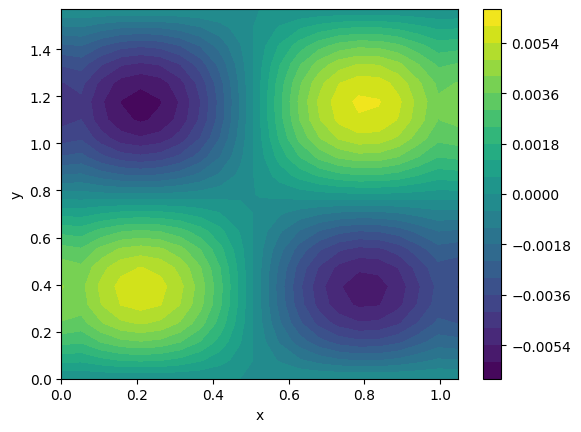

In [264]:
X, Y = np.meshgrid(x, y)
plt.contourf(X, Y, U.T, 20)
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [265]:
U

array([[ 0.00000000e+00,  1.38763797e-03,  2.60397096e-03,
         3.53562838e-03,  4.09481672e-03,  4.22944071e-03,
         3.92889496e-03,  3.22509084e-03,  2.18913317e-03,
         9.24146828e-04, -4.44984140e-04, -1.78393870e-03,
        -2.96212891e-03, -3.86542729e-03, -4.40720843e-03,
        -4.53663305e-03, -4.24338799e-03, -3.55847761e-03,
        -2.55114690e-03, -1.32273306e-03,  0.00000000e+00],
       [ 0.00000000e+00,  1.31830696e-03,  2.47377012e-03,
         3.35861427e-03,  3.88939251e-03,  4.01660699e-03,
         3.73021176e-03,  3.06058381e-03,  2.07535731e-03,
         8.72597424e-04, -4.28959685e-04, -1.70162417e-03,
        -2.82127276e-03, -3.67944512e-03, -4.19383501e-03,
        -4.31615859e-03, -4.03665340e-03, -3.38482509e-03,
        -2.42651919e-03, -1.25807630e-03,  0.00000000e+00],
       [ 0.00000000e+00,  1.60900440e-03,  3.02832111e-03,
         4.11880911e-03,  4.77567719e-03,  4.93706769e-03,
         4.58992796e-03,  3.77102734e-03,  2.56305023e